<a href="https://www.kaggle.com/code/zeeshanahmadyar/heart-disease-prediction-using-machine-learning?scriptVersionId=289876720" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Heart Disease Prediction Using Machine Learning**
*This notebook presents an end-to-end machine learning pipeline built on the Heart Disease dataset to predict the presence of heart disease in patients.*

***The workflow follows best practices in applied machine learning, including:***

* Understanding and exploring the dataset through structured analysis
* Performing data preprocessing and feature selection
* Training and comparing multiple classification models
* Evaluating model performance using appropriate metrics

The project emphasizes clean code, logical flow, and reproducibility, reflecting a **real-world ML problem-solving** approach rather than just model training.

This notebook is part of my continuous learning journey in **AI & Machine Learning**, where my focus is on building **practical**, scalable, and interpretable ML solutions using **Python and Scikit-Learn**.

The content is structured to be easily understood by **beginners** while still demonstrating a professional ML workflow suitable for portfolios, interviews, and real-world applications.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import random
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **Generate new data**

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.104348,-0.793686,1.398810,-0.328375,-1.035510,1
1,0.180954,-0.365517,0.876811,-1.334696,0.094988,0
2,1.634047,-0.559980,1.002883,-1.852792,0.836121,0
3,-0.699569,-2.382920,2.053642,-2.242819,-2.209669,1
4,0.724101,-0.588286,0.717611,-3.838852,0.182364,1


# **Now we create functions for sampling datasets**

In [3]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [4]:
# function for feature sampling
def sample_features(df, percent):
    features = df.columns.tolist()[:-1] # exclude target
    k = int(percent * len(features))
    selected_features = random.sample(features, k)

    new_df = df[selected_features].copy() #You are telling Pandas: “I want a real copy, not a view.”
    new_df['target'] = df['target']
    return new_df

In [5]:
# function for combining sampling
def combine_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [6]:
# sample rows
sample_rows(df, 0.1)

,col1,col2,col3,col4,col5,target
55,-0.338663,0.645580,0.146634,1.036121,0.632598,0
72,-0.036562,-2.654613,1.087731,-0.551577,-1.497490,1
28,-2.445793,2.297342,2.045645,2.611734,1.462145,0
4,0.724101,-0.588286,0.717611,-3.838852,0.182364,1
65,-0.760537,0.054731,-0.158516,-0.037117,1.286051,0
69,-0.839248,-1.537706,0.321957,-1.039074,-0.186642,1
92,-1.560576,-2.452114,-0.165326,-0.452361,-0.341015,1
25,-1.759966,3.185208,2.278168,2.489374,2.474728,0
9,-0.476365,1.238364,1.330600,0.931590,1.269704,0
62,-3.884289,2.988276,0.384712,5.388514,1.280397,0


In [7]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

# **Create Model Instance**

In [8]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [9]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [10]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [11]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[1] <= 0.261\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

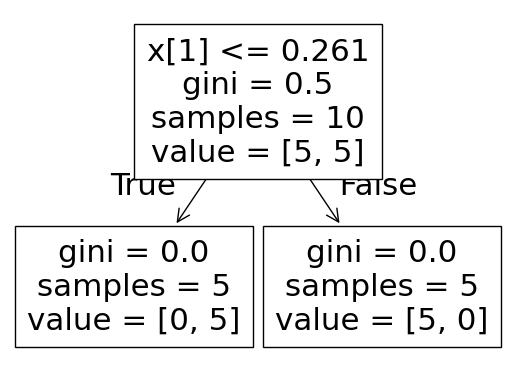

In [12]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.186\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[0] <= -0.377\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

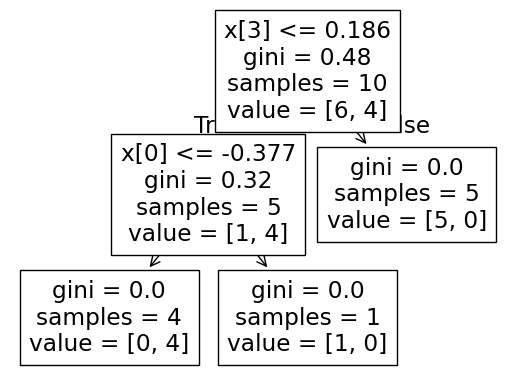

In [13]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[3] <= 1.012\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.4, 0.625, 'x[0] <= 0.072\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.375, 'x[3] <= -1.1\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.75, '  False')]

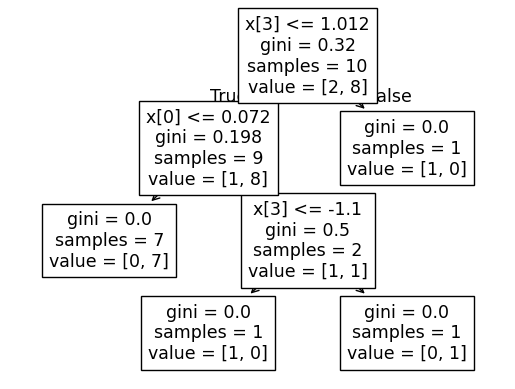

In [14]:
plot_tree(clf3)

In [15]:
clf1.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([0])

In [16]:
clf2.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([0])

In [17]:
clf3.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([0])

# **Features Sampling**

In [18]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

In [19]:
sample_features(df, 0.8)

,col4,col2,col3,col5,target
0,-0.328375,-0.793686,1.398810,-1.035510,1
1,-1.334696,-0.365517,0.876811,0.094988,0
2,-1.852792,-0.559980,1.002883,0.836121,0
3,-2.242819,-2.382920,2.053642,-2.209669,1
4,-3.838852,-0.588286,0.717611,0.182364,1
...,...,...,...,...,...
95,-1.607843,-1.981511,-0.893688,-0.345820,0
96,3.361125,1.038860,-0.887655,0.475838,0
97,0.810210,0.077149,0.430728,-0.679527,1
98,-2.131222,-0.084111,-0.268332,0.522071,1


In [20]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [21]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [22]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [23]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.4375, 0.9166666666666666, 'x[0] <= -0.13\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.1875, 0.75, 'x[3] <= -0.536\ngini = 0.113\nsamples = 50\nvalue = [3, 47]'),
 Text(0.3125, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.5833333333333334, 'x[2] <= -2.68\ngini = 0.078\nsamples = 49\nvalue = [2.0, 47.0]'),
 Text(0.125, 0.4166666666666667, 'x[3] <= 0.976\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.4166666666666667, 'x[0] <= -0.692\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(0.3125, 0.25, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.4375, 0.25, 'x[0] <= -0.685\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples 

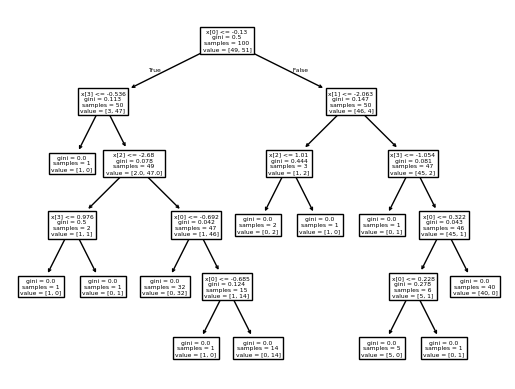

In [24]:
plot_tree(clf1)

[Text(0.671875, 0.9545454545454546, 'x[0] <= 1.003\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.46875, 0.8636363636363636, 'x[2] <= -0.489\ngini = 0.424\nsamples = 72\nvalue = [22, 50]'),
 Text(0.5703125, 0.9090909090909092, 'True  '),
 Text(0.25, 0.7727272727272727, 'x[0] <= -0.689\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.1875, 0.6818181818181818, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.3125, 0.6818181818181818, 'x[2] <= -0.888\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.25, 0.5909090909090909, 'x[2] <= -2.68\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3125, 0.5, 'x[0] <= 0.786\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.25, 0.4090909090909091, 'x[1] <= 0.378\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.1875, 0.3181818181818182, 'x[1] <= 0.235\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.125, 0.22727272727272727, 'x[3] <= 1.46\n

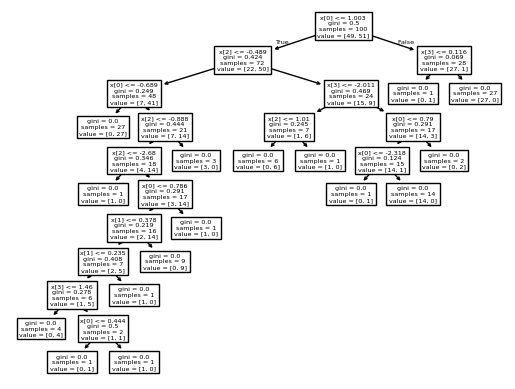

In [25]:
plot_tree(clf2)

[Text(0.671875, 0.9545454545454546, 'x[2] <= 1.003\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.46875, 0.8636363636363636, 'x[0] <= -0.489\ngini = 0.424\nsamples = 72\nvalue = [22, 50]'),
 Text(0.5703125, 0.9090909090909092, 'True  '),
 Text(0.25, 0.7727272727272727, 'x[2] <= -0.689\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.1875, 0.6818181818181818, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.3125, 0.6818181818181818, 'x[0] <= -0.888\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.25, 0.5909090909090909, 'x[2] <= -0.461\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3125, 0.5, 'x[2] <= 0.786\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.25, 0.4090909090909091, 'x[3] <= 0.378\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.1875, 0.3181818181818182, 'x[3] <= 0.235\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.125, 0.22727272727272727, 'x[2] <= 0.444

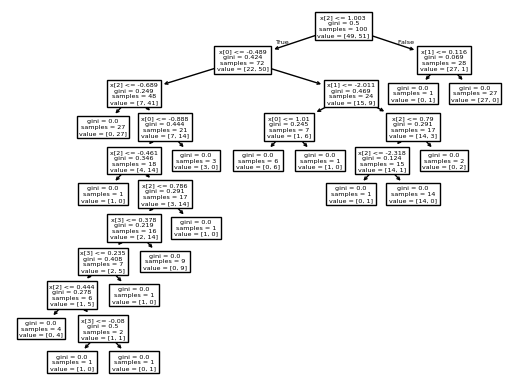

In [26]:
plot_tree(clf3)

In [27]:
clf1.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

In [28]:
clf2.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([0])

In [29]:
clf3.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([0])

# ***Bagging Vs RandomForest***

In [30]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [31]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

In [32]:
print(df.shape)

(100, 6)


In [33]:
df.head()

,col1,col2,col3,col4,col5,target
0,0.457844,4.493457,-2.790007,-1.173835,1.859501,1
1,3.104299,0.744757,-1.985579,-2.168624,0.455567,1
2,0.481038,-0.397352,-4.844275,-1.235980,-0.077845,0
3,0.680509,-1.334100,-1.425623,0.255035,-0.931749,0
4,-1.472395,-1.456498,-0.134117,0.441231,2.409206,0


# **Bagging Ensemble**

In [34]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:, :5], df.iloc[:, -1])

BaggingClassifier(max_features=2)

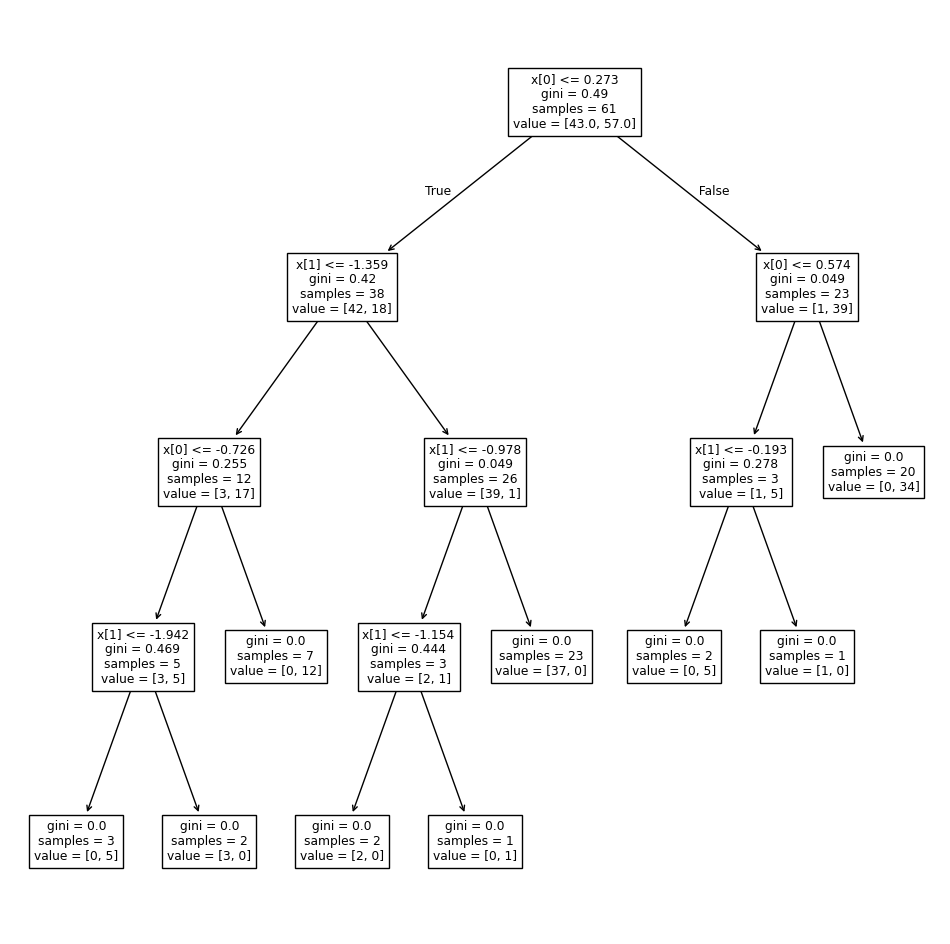

In [35]:
plt.figure(figsize=(12, 12))
plot_tree(bag.estimators_[0])
plt.show() # Only 2 cols show because we can choose max_features=2

# ***RandomForestClassfier***

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(df.iloc[:, :5], df.iloc[:, -1])

RandomForestClassifier()

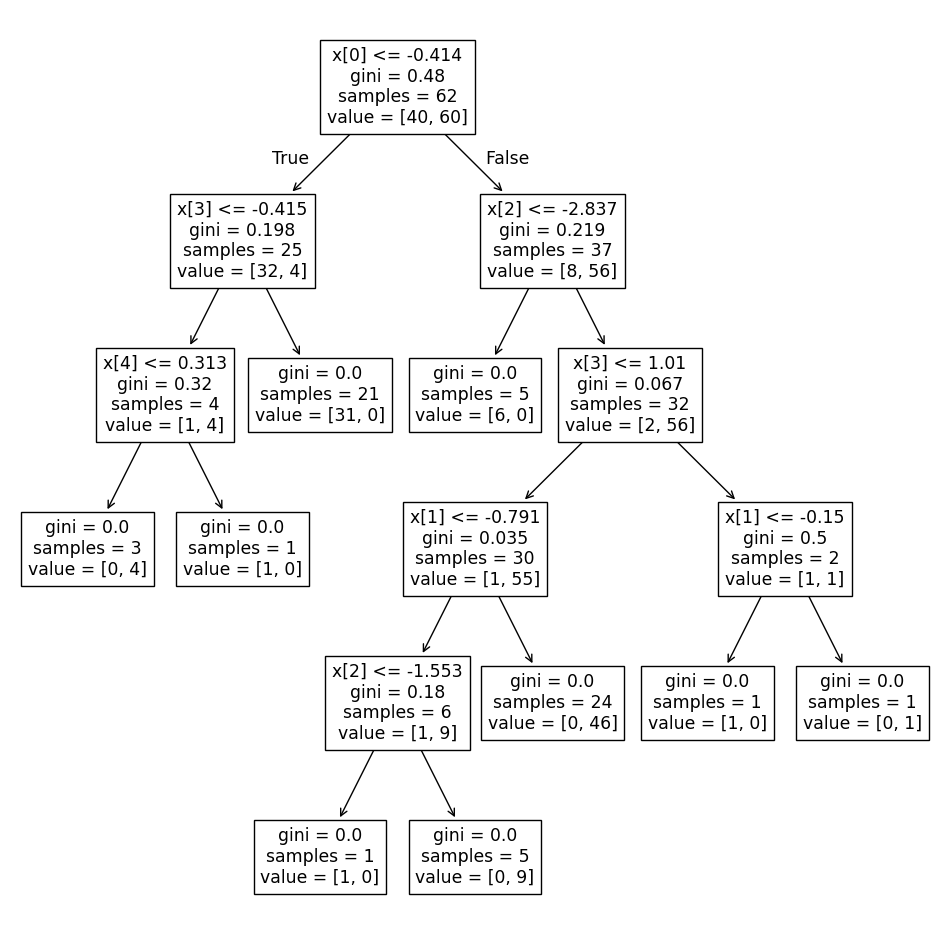

In [38]:
plt.figure(figsize=(12, 12))
plot_tree(rfc.estimators_[1])
plt.show()

# ***Hyperparameter Tuning***
> We can check the best hyperparameter by using  GridSearchCV and RandomizeSearchCV

In [39]:
df1 = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df.shape

(100, 6)

In [41]:
X = df1.iloc[:, 0:-1]
y = df1.iloc[:, -1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
rf = RandomForestClassifier()

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = rf.predict(X_test)

In [46]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


In [47]:
gb = GradientBoostingClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()

In [48]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
y_pred_gb = gb.predict(X_test)

In [50]:
print('Accuracy Gradient Boosting:', accuracy_score(y_test, y_pred_gb))

Accuracy Gradient Boosting: 0.9512987012987013


In [51]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [52]:
y_pred_svc = svc.predict(X_test)

In [53]:
print('Accuracy SVC:', accuracy_score(y_test, y_pred_svc))

Accuracy SVC: 0.6753246753246753


In [54]:
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_lr = lr.predict(X_test)

In [56]:
print('Accuracy Logistic Regression:', accuracy_score(y_test, y_pred_lr))

Accuracy Logistic Regression: 0.8181818181818182


In [57]:
models_accuracy = {
    'GradientBoosting': 0.9512987012987013,
    'SVC': 0.6753246753246753,
    'LogisticRegression': 0.8181818181818182
}

# **Sort the model score**

In [58]:
sorted_score = sorted(models_accuracy.items(), key=lambda x: x[1], reverse=True)

In [59]:
for rank, (name, score) in enumerate(sorted_score, start=1):
    print(f'{rank} --> {name}: {np.round(score, 2)}')

1 --> GradientBoosting: 0.95
2 --> LogisticRegression: 0.82
3 --> SVC: 0.68


# **Checking by Cross Validation**

In [60]:
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.9970588235294118)

# **Grid Search CV**
> ***Find the best hyperparameter for the Model by using GridSearchCV***

In [61]:
n_estimators = [20, 50, 100, 150]
max_features = [0.2, 0.6, 1.0]
max_depth = [2, 8, None]
max_samples = [0.5, 0.75, 1.0]

In [62]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'max_samples': max_samples
}

In [63]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1)

In [64]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.5s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 50, 100, 150]},
             verbose=2)

In [65]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 100}